### Importation of libraries and dataset
We import all necessary libraries for data handling, visualization, preprocessing, and machine learning.
We then retrieve the Phising Websites dataset, and we separate the features (x) and the target labels (y), which will later be used for trainning and evaluating classification model that detects phising websites.

In [1]:
from ucimlrepo import fetch_ucirepo # used to directly fetch datasets from UCI Machine learning repository
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
phishing_websites = fetch_ucirepo(id=327) # fetch the "phising websites" dataset, this function downloads the dataset metadata, features and targets.
X = phishing_websites.data.features # extract features
y = phishing_websites.data.targets # extract target labels

### Dataset analysis
In this cell, we initialise the exploration of data analysis.
We inspect the dimensions of the feature and target sets, display a sample of the data, check for missing values, and generate descriptive statistics. We also examine the distribution of the target labels to detect class imbalance, which is common in security datasets. Finally, we visualize the correlations among all features using a heatmap, which helps identify redundant or highly related variables before model training

Features shape: (11055, 30)
Target shape: (11055, 1)

First 5 rows of features:


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1



Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  i

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Target Distribution :
result
 1        6157
-1        4898
Name: count, dtype: int64


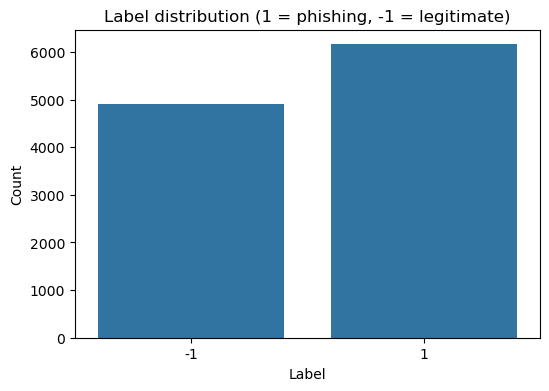

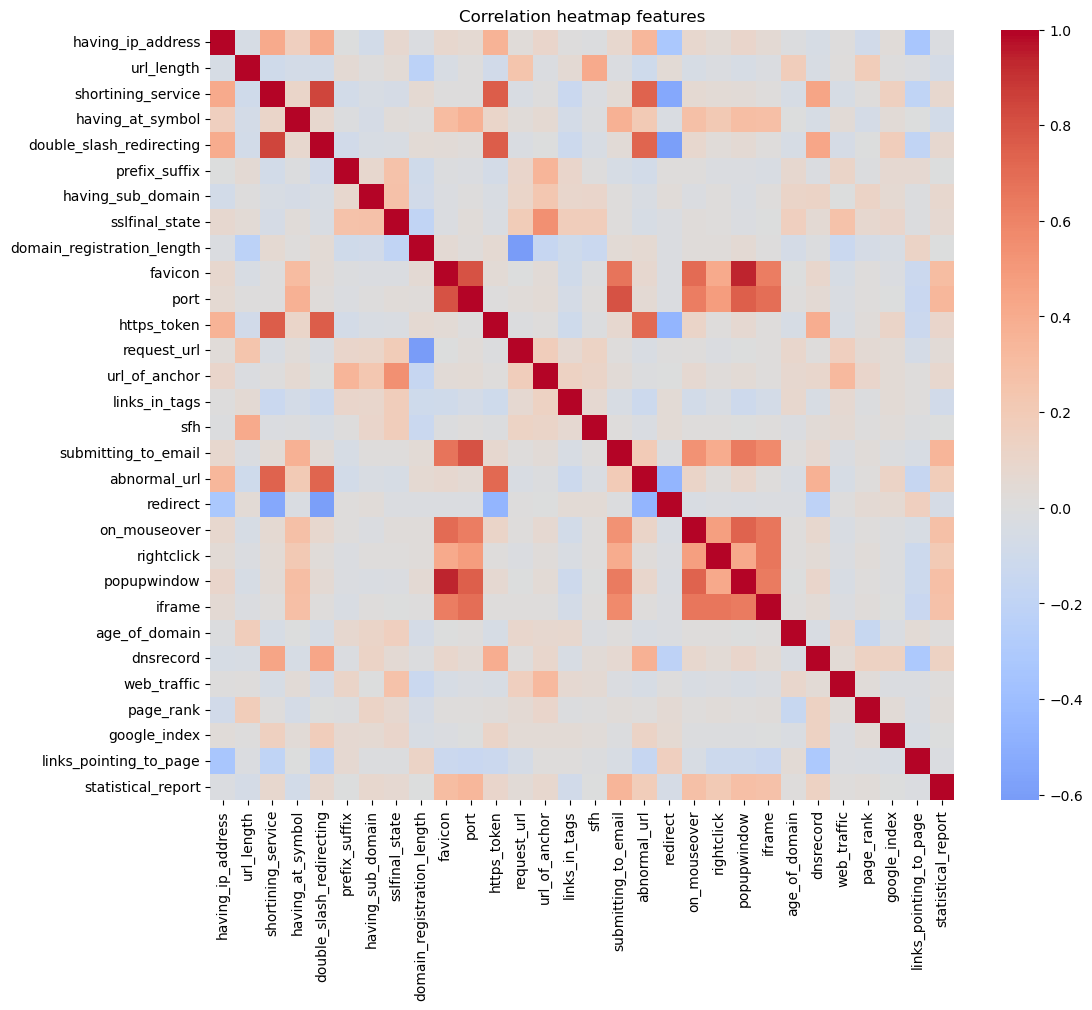

In [2]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")
print("First 5 rows of features:")
display(X.head()) # we use display intead of print to ensures a cleaner table rendering 
print("\nDataset Info :")
print(X.info()) # we show data type and memory usage, useful for detectiong problematic columns
print("\nMissing Values :")
print(X.isna().sum().sum()) # total number of missing values
print("\nDescriptive Statistics :")
display(X.describe()) # summary statitics for each numerical feature
print("\nTarget Distribution :")
print(y.value_counts()) #show class imabalance

y_series = pd.Series(y.values.ravel(), name="label") #convert target to pandas series for plotting

plt.figure(figsize=(6,4))
sns.countplot(x=y_series)
plt.title("Label distribution (1 = phishing, -1 = legitimate)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#corelation heatmap to visualize relationships  between features
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", center=0) #center=0 to interpret positive vs negative correlations
plt.title("Correlation heatmap features")
plt.show()

### Duplicate Analysis

This section analyzes duplicate rows in the phishing websites dataset.

Important note on duplicates:
This dataset uses discrete features with values limited to {-1, 0, 1}, representing boolean 
properties of websites (for example: presence of IP address, SSL state, etc.). With 30 binary or 
ternary features, the number of unique possible combinations is naturally limited. 

As a result, a high duplicate rate (>70%) is expected and normal for this dataset. 
Phishing websites often share the same technical signatures, so many rows will have identical 
feature values.

What matters to check:
1. Labeling conflicts (same features, different targets) - indicates a real problem
2. Class distribution (balance between phishing and legitimate sites)
3. Overall data consistency


In [3]:
# Check for duplicates in the dataset
data_complete = pd.concat([X, y], axis=1)

# Complete duplicates (same features and target)
complete_duplicates = data_complete.duplicated(keep=False).sum()
print(f"\nComplete duplicates: {complete_duplicates} ({complete_duplicates/len(data_complete)*100:.1f}%)")

# Feature duplicates (ignoring target)
feature_duplicates = X.duplicated(keep=False).sum()
unique_combinations = X.drop_duplicates().shape[0]
print(f"Feature duplicates: {feature_duplicates} ({feature_duplicates/len(X)*100:.1f}%)")
print(f"Unique feature combinations: {unique_combinations}")

# Check for labeling conflicts (same features, different labels)
print("\nChecking for labeling conflicts :")
conflicts = 0
conflict_rows = 0

if feature_duplicates > 0:
    for features in X[X.duplicated(keep=False)].drop_duplicates().values:
        mask = (X == features).all(axis=1)
        labels = y.loc[mask].iloc[:, 0].unique()
        if len(labels) > 1:
            conflicts += 1
            conflict_rows += mask.sum()

print(f"Found {conflicts} conflicting feature groups")
if conflicts > 0:
    print(f"Total rows with conflicts: {conflict_rows} ({conflict_rows/len(X)*100:.1f}%)")
    print("Note: These should be investigated as they have the same features but different labels")

# Feature characteristics
print("\nFeature characteristics:")
cardinality = X.nunique()
print(f"Binary features (2 values): {(cardinality == 2).sum()}")
print(f"Ternary features (3 values): {(cardinality == 3).sum()}")



Complete duplicates: 7843 (70.9%)
Feature duplicates: 7884 (71.3%)
Unique feature combinations: 5785

Checking for labeling conflicts :
Found 64 conflicting feature groups
Total rows with conflicts: 357 (3.2%)
Note: These should be investigated as they have the same features but different labels

Feature characteristics:
Binary features (2 values): 22
Ternary features (3 values): 8


Summary:
The high duplicate rate is normal for this dataset since features are discrete (values -1, 0, 1). Many phishing sites share similar characteristics, which explains why 5785 unique combinations appear 1.9 times on average.


### Outlier Analysis

This section detects and analyzes outliers in the dataset using Isolation Forest.

In [4]:
# Outlier Analysis using Isolation Forest
from sklearn.ensemble import IsolationForest


# Detect outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
outlier_count = (outliers == -1).sum()

print(f"\nOutliers detected: {outlier_count} ({outlier_count/len(X)*100:.1f}%)")
print("(Using Isolation Forest with 5% contamination)")

# Check class distribution
print("\nClass distribution:")
print(y.iloc[:, 0].value_counts().sort_index())
print()
print(y.iloc[:, 0].value_counts(normalize=True).sort_index() * 100)

# Calculate class imbalance
class_counts = y.iloc[:, 0].value_counts()
if len(class_counts) == 2:
    ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print(f"\nClass imbalance ratio: {ratio:.2f}:1")

# Check outliers per class
print("\nOutliers by class:")
for class_label in y.iloc[:, 0].unique():
    class_mask = y.iloc[:, 0] == class_label
    class_outliers = (outliers[class_mask] == -1).sum()
    total_class = class_mask.sum()
    print(f"Class {class_label}: {class_outliers} outliers ({class_outliers/total_class*100:.1f}%)")




Outliers detected: 553 (5.0%)
(Using Isolation Forest with 5% contamination)

Class distribution:
result
-1    4898
 1    6157
Name: count, dtype: int64

result
-1    44.305744
 1    55.694256
Name: proportion, dtype: float64

Class imbalance ratio: 1.26:1

Outliers by class:
Class -1: 353 outliers (7.2%)
Class 1: 200 outliers (3.2%)


We detected 553 outliers (5%) using Isolation Forest, which is expected since we set the contamination parameter to 0.05. These represent websites with unusual or rare feature combinations.
The dataset has good class balance with 55.7% legitimate sites and 44.3% phishing sites, giving a class imbalance ratio of 1.26:1 which is reasonable for classification tasks.

One interesting finding is that phishing sites have more outliers (7.2%) compared to legitimate sites (3.2%). This makes sense because phishing websites use a wider variety of techniques and attack methods, while legitimate sites tend to follow more standard patterns. This is actually a good sign that our dataset captures the real-world complexity of the problem.

Overall, the data is well-balanced and ready for model training without requiring special handling for class imbalance.

### Data Pre-processing

This section prepares the data for model training. We perform the following trnasformations :
- Target encoding: converting labels from (-1, 1) to (0, 1) to ensure compability with standard evaluation metrics.
- Normalization: applying a standardScaler to scale the features
- Train-test split : using a stratified split to preserve class balance between training and testing sets.


In [5]:
#Encode target (-1,1) to (0,1) 
y_binary = y.replace({-1: 0, 1: 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.25, random_state=42, stratify=y_binary
)

#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nTrain set:", X_train.shape, " Test set:", X_test.shape)


Train set: (8291, 30)  Test set: (2764, 30)


### Creation of the first models + hyperparameter tuning

In this section, we build baseline models and optimize them through hyperparameter tuning.
We use randomforest classifier as the initial model, as it is robust and provides a strong baseline performance
The hyperparameters are then adjusted to improve accuracy and reduce overlifting.


Training baseline model (Random Forest)

Baseline Model Evaluation :
Accuracy: 0.9750361794500724

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1225
           1       0.97      0.99      0.98      1539

    accuracy                           0.98      2764
   macro avg       0.98      0.97      0.97      2764
weighted avg       0.98      0.98      0.98      2764



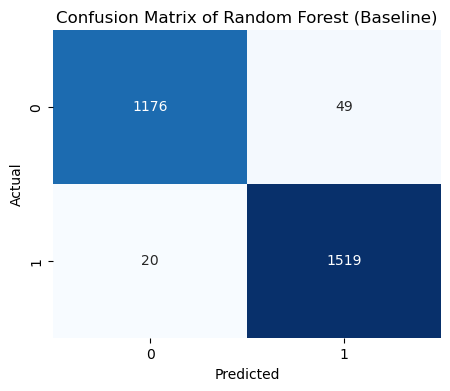

In [6]:
print("\nTraining baseline model (Random Forest)")
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
#evaluation
print("\nBaseline Model Evaluation :")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest (Baseline)")
plt.show()

## GridSearch

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Create the base model
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)
print("\nBaseline test accuracy:", accuracy_score(y_test, base_dt.predict(X_test)))


Baseline test accuracy: 0.9663531114327062


In [8]:
# Define hyperparameter grid

print("\n Defining hyperparameter grid...")

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]  # Important for imbalanced data!
}

total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"\n Hyperparameter grid defined:")
print(f"  - Total combinations: {total_combinations}")
print(f"  - Parameters to tune: {list(param_grid.keys())}")



 Defining hyperparameter grid...

 Hyperparameter grid defined:
  - Total combinations: 1728
  - Parameters to tune: ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'class_weight']


In [9]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV
print("\nRunning GridSearchCV (this may take a few minutes)...")

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Better metric for imbalanced data
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train.values.ravel())

print(f"  - Best CV F1-Score: {grid_search.best_score_:.4f}")
print(f"  - Best parameters: {grid_search.best_params_}")


Running GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
  - Best CV F1-Score: 0.9622
  - Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


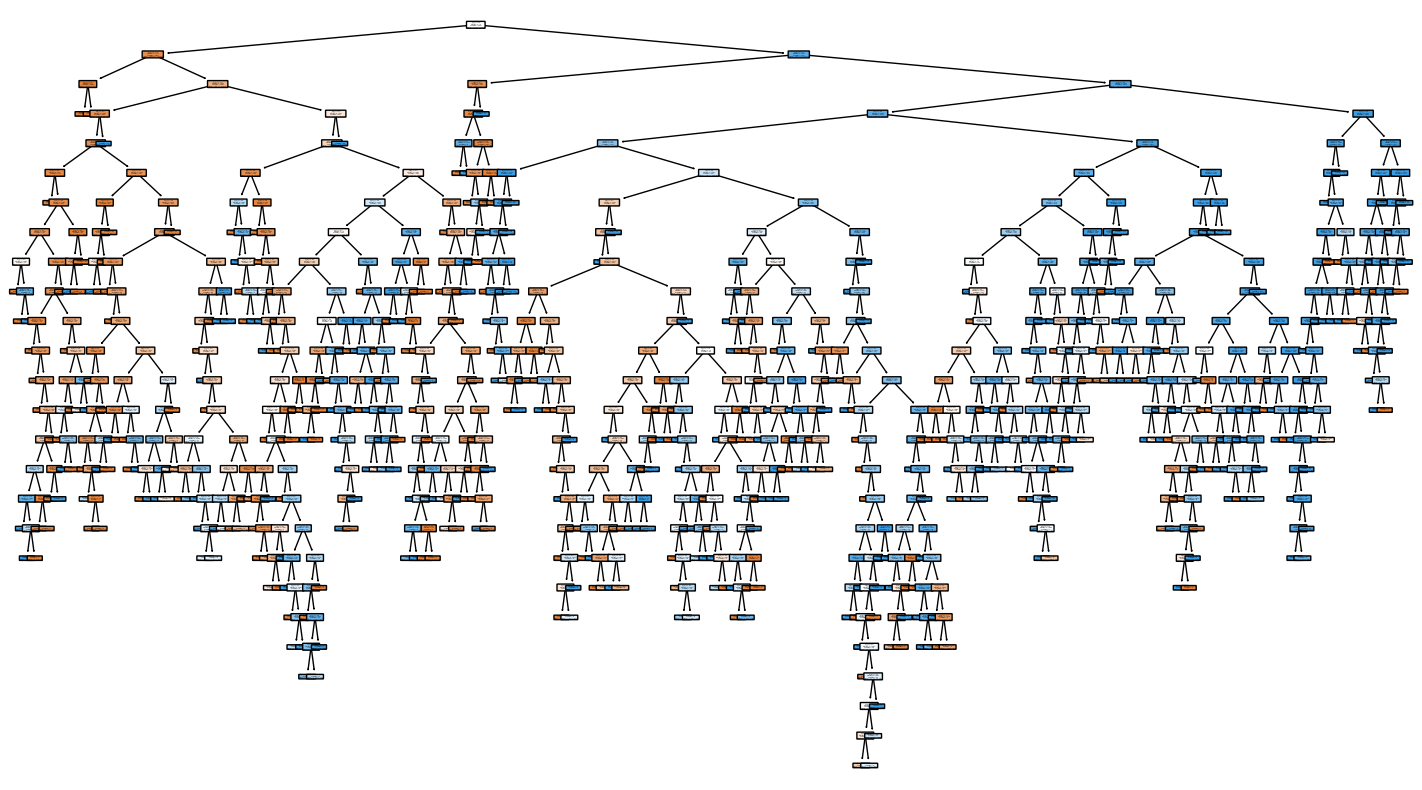

In [10]:
# Visualize optimal tree
plt.figure(figsize=(18, 10))
plot_tree(
    grid_search.best_estimator_,
    filled=True,
    feature_names=phishing_websites.feature_names,
    class_names=phishing_websites.target_names,
    rounded=True
)
plt.show()

### Address overfitting / underfitting

### Relevant metrics

### Dimension reduction

### Ensemble models + advanced models

### Comparison of models + Conclusion